In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
train.shape

(2051, 81)

In [4]:
test.shape

(878, 80)

In [5]:
numerical_train = train.select_dtypes(['number'])

In [6]:
train.select_dtypes('object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [8]:
numerical_train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [9]:
def kleaning(x_data):
    preclean = x_data.select_dtypes(['number']) # .drop('SalePrice',axis=1)   # Done initially should split afterwards for reusability purposes
    # preclean.isnull().sum()       # In case these need to be changed in later models
    try: 
        dropped_clean = preclean.drop(['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area'], axis=1)
    except:
        dropped_clean = preclean
    filled = pd.DataFrame(columns= dropped_clean.columns)
    for column in dropped_clean.columns:
        filled[column] = dropped_clean[column].fillna(dropped_clean[column].mean()) 
    return filled

working_train = kleaning(numerical_train)

In [12]:
top_corr =(working_train.corr()[['SalePrice']]
                   .sort_values(by='SalePrice',
                                ascending=False)
          )

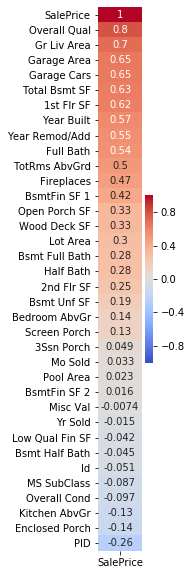

In [13]:
plt.figure(figsize=(1,10))
sns.heatmap(top_corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1);

In [26]:
# Using .4 Correlation as cut-off 
features = top_corr.index[1:13]
y = train['SalePrice']

In [27]:
pre_poly_train = working_train[top_corr.index[1:13]]

In [28]:
pre_poly_train.head()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,BsmtFin SF 1
0,6,1479,475.0,2.0,725.0,725,1976,2005,2,6,0,533.0
1,7,2122,559.0,2.0,913.0,913,1996,1997,2,8,1,637.0
2,5,1057,246.0,1.0,1057.0,1057,1953,2007,1,5,0,731.0
3,5,1444,400.0,2.0,384.0,744,2006,2007,2,7,0,0.0
4,6,1445,484.0,2.0,676.0,831,1900,1993,2,6,0,0.0


In [29]:
pf = PolynomialFeatures()
post_poly_train = pd.DataFrame(pf.fit_transform(pre_poly_train), columns=pf.get_feature_names(features))

In [30]:
post_poly_train.head(3)

,1,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Full Bath^2,Full Bath TotRms AbvGrd,Full Bath Fireplaces,Full Bath BsmtFin SF 1,TotRms AbvGrd^2,TotRms AbvGrd Fireplaces,TotRms AbvGrd BsmtFin SF 1,Fireplaces^2,Fireplaces BsmtFin SF 1,BsmtFin SF 1^2
0,1.0,6.0,1479.0,475.0,2.0,725.0,725.0,1976.0,2005.0,2.0,...,4.0,12.0,0.0,1066.0,36.0,0.0,3198.0,0.0,0.0,284089.0
1,1.0,7.0,2122.0,559.0,2.0,913.0,913.0,1996.0,1997.0,2.0,...,4.0,16.0,2.0,1274.0,64.0,8.0,5096.0,1.0,637.0,405769.0
2,1.0,5.0,1057.0,246.0,1.0,1057.0,1057.0,1953.0,2007.0,1.0,...,1.0,5.0,0.0,731.0,25.0,0.0,3655.0,0.0,0.0,534361.0


In [41]:
pre_corr_poly = pd.merge(left=post_poly_train, right=working_train, copy=False)

In [42]:
pre_corr_poly.head()

,1,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1.0,6.0,1479.0,475.0,2.0,725.0,725.0,1976.0,2005.0,2.0,...,0,44,0,0,0,0,0,3,2010,130500
1,1.0,7.0,2122.0,559.0,2.0,913.0,913.0,1996.0,1997.0,2.0,...,0,74,0,0,0,0,0,4,2009,220000
2,1.0,5.0,1057.0,246.0,1.0,1057.0,1057.0,1953.0,2007.0,1.0,...,0,52,0,0,0,0,0,1,2010,109000
3,1.0,5.0,1444.0,400.0,2.0,384.0,744.0,2006.0,2007.0,2.0,...,100,0,0,0,0,0,0,4,2010,174000
4,1.0,6.0,1445.0,484.0,2.0,676.0,831.0,1900.0,1993.0,2.0,...,0,59,0,0,0,0,0,3,2010,138500


In [68]:
polly_features = top_corr.index[1:13]
def polly(working, polly_features=polly_features):
    pre_poly = working[polly_features]
    pf = PolynomialFeatures()
    post_poly = pd.DataFrame(pf.fit_transform(pre_poly), columns=pf.get_feature_names(polly_features))
    return post_poly

X_test = polly(kleaning(test))

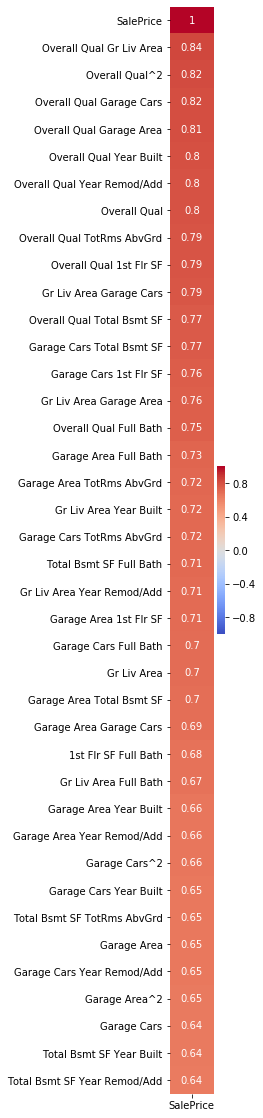

In [45]:
corr_poly = pre_corr_poly.corr()
X = post_poly_train

top_corr_poly =(corr_poly[['SalePrice']]
                   .sort_values(by='SalePrice',
                                ascending=False)
                .head(40)
          )

plt.figure(figsize=(1,20))
sns.heatmap(top_corr_poly,
            annot=True,
            cmap='coolwarm',
            vmin=-1);

In [65]:
features = top_corr_poly.index[1:37]
X = post_poly_train[features]

In [73]:
lr = LinearRegression()
lr.fit(X, np.log(y))
lr.score(X, np.log(y))

0.8544492510616989

In [69]:
X_test = polly(kleaning(test))

In [74]:
y_pred = np.exp(lr.predict(X_test[features]))

In [75]:
df3 = pd.DataFrame({
    'Id':test['Id'],
    'SalePrice': y_pred
})
df3.to_csv('test4_predictions.csv', index=False)